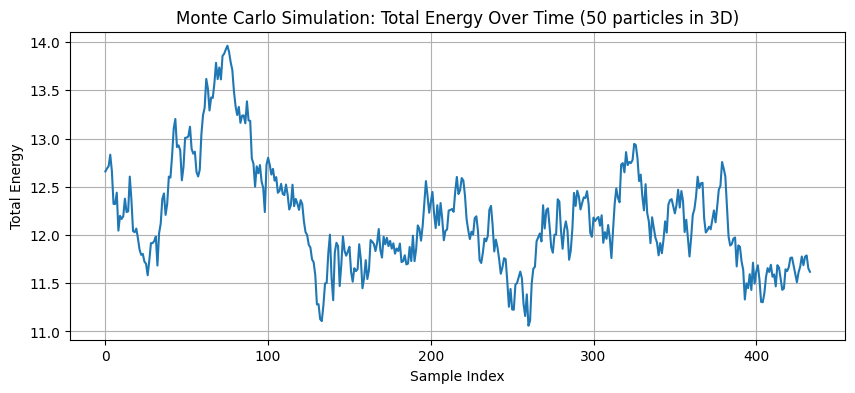

In [1]:
# Re-import libraries after code execution environment reset
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
N = 50                  # Number of particles
steps = 5000            # Total Monte Carlo steps
L = 1.0                 # Box length (1x1x1 cube)
delta = 0.1             # Max displacement per move
beta = 1.0              # Inverse temperature
k = 1.0                 # Spring constant (toward center)

# --- Initialization ---
positions = np.random.uniform(0, L, size=(N, 3))  # N particles in 3D
energy = lambda x: np.sum((x - 0.5)**2)           # U = sum over particles

# --- Data Storage ---
trajectory = []
energy_log = []

# --- Monte Carlo Loop ---
for step in range(steps):
    # Pick a random particle
    i = np.random.randint(0, N)
    old_pos = positions[i].copy()
    new_pos = old_pos + np.random.uniform(-delta, delta, size=3)

    # Reflect at boundaries
    if np.any(new_pos < 0) or np.any(new_pos > L):
        continue  # Invalid move, skip

    # Compute energy change (local)
    U_old = energy(old_pos)
    U_new = energy(new_pos)
    delta_U = U_new - U_old

    # Accept or reject move
    if delta_U < 0 or np.random.rand() < np.exp(-beta * delta_U):
        positions[i] = new_pos  # Accept

    # Record data
    if step % 10 == 0:
        trajectory.append(positions.copy())
        total_energy = np.sum([energy(p) for p in positions])
        energy_log.append(total_energy)

# --- Visualization ---
trajectory = np.array(trajectory)

# Plot energy vs. time
plt.figure(figsize=(10, 4))
plt.plot(energy_log)
plt.xlabel("Sample Index")
plt.ylabel("Total Energy")
plt.title("Monte Carlo Simulation: Total Energy Over Time (50 particles in 3D)")
plt.grid(True)
plt.show()


 What the Plot Shows

X-axis (Sample Index): Time progression (every 10 Monte Carlo steps)
Y-axis (Total Energy): Total harmonic potential energy of all particles at that point
Step-by-Step Interpretation

1. Early Fluctuations (High Energy Region)
At the beginning:

Particles are placed randomly → many are far from the center of the box (where energy is high).
Therefore, the total energy starts high.
The system starts to accept more moves that lower energy → this causes the curve to drop.
Interpretation:

The system is “cooling down,” settling into lower-energy configurations.
2. Mid-Run Fluctuations (Equilibration)
In the middle:

Energy goes up and down — sometimes significantly.
This is because some proposed moves increase energy, and some are rejected.
But overall, the system stays around a stable average.
🔍 Interpretation:

The system has reached thermal equilibrium: it’s not getting lower forever, but now fluctuates like a real physical system at temperature
T
T.
3. Late-Time Behavior (Stable “Thermal Cloud”)
Energy values hover around a steady range.
You see smaller peaks and valleys, but no strong upward/downward trend.
This is characteristic of a steady-state distribution (like gas molecules jiggling in place at a stable temperature).
Interpretation:

Your Monte Carlo algorithm has successfully simulated the thermal behavior of 50 particles in a 3D harmonic trap.